In [1]:
import torch
torch.__version__

'2.3.1+cu118'

In [2]:
import torch
print(torch.cuda.is_available())  # True여야 함
print(torch.cuda.get_device_name(0))  # GPU 이름 출력
print(torch.cuda.device_count())

True
NVIDIA GeForce RTX 3050 Ti Laptop GPU
1


In [3]:
from IPython import display
display.clear_output()
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196  Python-3.11.9 torch-2.3.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)
Setup complete  (12 CPUs, 31.7 GB RAM, 172.3/951.6 GB disk)


In [4]:
from roboflow import Roboflow
rf = Roboflow(api_key="pSKVxTiuweLONzMDubjk")
project = rf.workspace("zebra-learn").project("all-books-mumha")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [5]:
!cat /all-books-1/data.yaml

'cat'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


## predict

In [6]:
import os
print(os.getcwd())

c:\Users\SSAFY\Desktop\특화\yolo



0: 352x448 2 books, 127.1ms
Speed: 5.0ms preprocess, 127.1ms inference, 141.3ms postprocess per image at shape (1, 3, 352, 448)


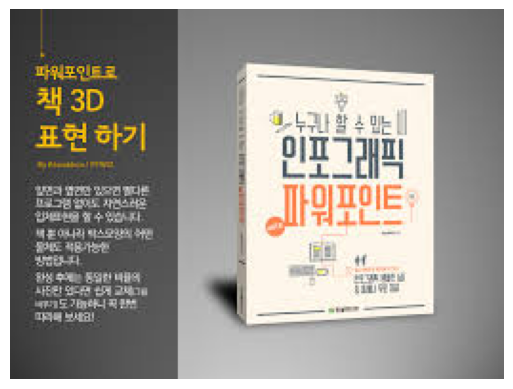

In [9]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# 1. 모델 로드 (학습된 모델 경로를 지정)
model = YOLO('./runs/detect/train4/weights//best.pt')  # 'best.pt' 파일은 학습 완료된 모델의 가중치 파일입니다.

# 2. 이미지 로드
img_path = 'book.jpg'  # 예측하고자 하는 이미지 경로
img = cv2.imread(img_path)

# 3. 예측 수행
results = model(img)  # 이미지에 대해 예측 수행

# 4. 예측 결과 시각화
# 자동으로 결과를 이미지에 그린 후 화면에 표시할 수 있습니다.
# 결과 이미지는 results.show()로 간단히 시각화 가능합니다.
# results.show()

# 5. matplotlib을 사용한 시각화 (원한다면)
# RGB로 변환 (cv2는 BGR 형식이므로 변환이 필요함)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis('off')  # 축 제거
plt.show()

In [10]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'book'}
 orig_img: array([[[ 49,  49,  49],
         [ 49,  49,  49],
         [ 50,  50,  50],
         ...,
         [100, 100, 100],
         [100, 100, 100],
         [100, 100, 100]],
 
        [[ 49,  49,  49],
         [ 49,  49,  49],
         [ 50,  50,  50],
         ...,
         [100, 100, 100],
         [100, 100, 100],
         [100, 100, 100]],
 
        [[ 49,  49,  49],
         [ 49,  49,  49],
         [ 50,  50,  50],
         ...,
         [100, 100, 100],
         [100, 100, 100],
         [100, 100, 100]],
 
        ...,
 
        [[ 52,  52,  52],
         [ 52,  52,  52],
         [ 52,  52,  52],
         ...,
         [105, 105, 105],
         [105, 105, 105],
         [105, 105, 105]],
 
        [[ 51,  51,  51],
         [ 51,  51,  51],
         [ 51,  51,  51],
         ...,
         [102, 102, 102],
     

In [10]:
result = model.predict('./book.jpg', save=True)


image 1/1 c:\Users\SSAFY\Desktop\\yolo_test\book.jpg: 448x352 1 book, 58.0ms
Speed: 3.0ms preprocess, 58.0ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 352)
Results saved to runs\detect\predict


In [13]:
result2 = model.predict('./책.jpg', save=True)


image 1/1 c:\Users\SSAFY\Desktop\\yolo_test\.jpg: 448x448 1 book, 73.7ms
Speed: 4.0ms preprocess, 73.7ms inference, 3.0ms postprocess per image at shape (1, 3, 448, 448)
Results saved to runs\detect\predict


In [14]:
result3 = model.predict('./책3.jpg', save=True)


image 1/1 c:\Users\SSAFY\Desktop\\yolo_test\3.jpg: 288x448 (no detections), 128.0ms
Speed: 2.0ms preprocess, 128.0ms inference, 2.0ms postprocess per image at shape (1, 3, 288, 448)
Results saved to runs\detect\predict


In [15]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# 1. 모델 로드 (학습된 모델 경로를 지정)
model = YOLO('./runs/detect/train5/weights/best.pt')  # 'best.pt' 파일은 학습 완료된 모델의 가중치 파일입니다.

In [11]:
model.predict('book.jpg', save=True)


image 1/1 c:\Users\SSAFY\Desktop\\yolo\book.jpg: 352x448 2 books, 56.0ms
Speed: 3.0ms preprocess, 56.0ms inference, 5.0ms postprocess per image at shape (1, 3, 352, 448)
Results saved to runs\detect\predict3


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'book'}
 orig_img: array([[[ 49,  49,  49],
         [ 49,  49,  49],
         [ 50,  50,  50],
         ...,
         [100, 100, 100],
         [100, 100, 100],
         [100, 100, 100]],
 
        [[ 49,  49,  49],
         [ 49,  49,  49],
         [ 50,  50,  50],
         ...,
         [100, 100, 100],
         [100, 100, 100],
         [100, 100, 100]],
 
        [[ 49,  49,  49],
         [ 49,  49,  49],
         [ 50,  50,  50],
         ...,
         [100, 100, 100],
         [100, 100, 100],
         [100, 100, 100]],
 
        ...,
 
        [[ 52,  52,  52],
         [ 52,  52,  52],
         [ 52,  52,  52],
         ...,
         [105, 105, 105],
         [105, 105, 105],
         [105, 105, 105]],
 
        [[ 51,  51,  51],
         [ 51,  51,  51],
         [ 51,  51,  51],
         ...,
         [102, 102, 102],
     

In [15]:
model.predict('book5.jpg', save=True)


image 1/1 c:\Users\SSAFY\Desktop\\yolo\book5.jpg: 256x448 1 book, 43.0ms
Speed: 2.0ms preprocess, 43.0ms inference, 4.0ms postprocess per image at shape (1, 3, 256, 448)
Results saved to runs\detect\predict3


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'book'}
 orig_img: array([[[238, 197, 165],
         [236, 195, 163],
         [236, 192, 161],
         ...,
         [255, 253, 253],
         [255, 254, 254],
         [255, 254, 254]],
 
        [[241, 197, 168],
         [240, 196, 167],
         [238, 194, 165],
         ...,
         [253, 254, 252],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[243, 197, 166],
         [241, 197, 168],
         [240, 196, 167],
         ...,
         [255, 253, 252],
         [255, 255, 254],
         [255, 255, 254]],
 
        ...,
 
        [[  9,  24,  16],
         [ 11,  27,  16],
         [ 10,  27,  14],
         ...,
         [ 48,  61,  53],
         [ 40,  50,  38],
         [ 35,  41,  30]],
 
        [[  8,  25,  12],
         [  8,  24,  13],
         [ 12,  28,  17],
         ...,
         [ 11,  22,  14],
     

In [13]:
import requests

res = requests.get('http://127.0.0.1:8000/api/v1/mission/object/')
res.json()

{'data': {'object_id': '5', 'object_name': 'chopstick'},
 'message': '실내 미션 조회에 성공하였습니다.'}

In [15]:
import requests

with open('./젓가락.jpg', 'rb') as files:
    res = requests.post('http://127.0.0.1:8000/api/v1/mission/object/', files={'file': files})
print(res)

<Response [500]>


In [161]:
res.json()

{'data': {'object_id': '2', 'object_name': 'chopstick'},
 'detect': {'confidence': 0.9, 'success': True}}

In [117]:
import requests
with open('./다운로드.jpg','rb') as f:
  response = requests.post('http://127.0.0.1:8000/api/v1/mission/object/', files={'file':f})

print(response)

<Response [500]>


In [38]:
from ultralytics import YOLO
object = 'chopstick'
model = YOLO(f'C:/Users/SSAFY/Desktop/특화/yolo/model/{object}.pt')

model('./chopstick.jpg', save = True)


image 1/1 c:\Users\SSAFY\Desktop\\yolo\.jpg: 448x640 (no detections), 37.0ms
Speed: 4.0ms preprocess, 37.0ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs\detect\predict3


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'chopstick'}
 obb: None
 orig_img: array([[[182,  90,   0],
         [182,  90,   0],
         [182,  90,   0],
         ...,
         [187,  98,   0],
         [187,  98,   0],
         [187,  98,   0]],
 
        [[182,  90,   0],
         [182,  90,   0],
         [182,  90,   0],
         ...,
         [187,  98,   0],
         [187,  98,   0],
         [187,  98,   0]],
 
        [[182,  90,   0],
         [182,  90,   0],
         [182,  90,   0],
         ...,
         [187,  98,   0],
         [187,  98,   0],
         [187,  98,   0]],
 
        ...,
 
        [[  8,   3,   3],
         [  8,   3,   3],
         [  8,   3,   3],
         ...,
         [ 10,   3,   2],
         [  5,   0,   0],
         [  8,   2,   1]],
 
        [[  8,   3,   3],
         [  8,   3,   3],
         [  8,   3,   3],
         ...,
         [ 15, 

In [64]:
result2 = model('./산.jpg')


image 1/1 c:\Users\SSAFY\Desktop\\yolo\.jpg: 448x640 (no detections), 39.0ms
Speed: 4.0ms preprocess, 39.0ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)


In [67]:
result

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'chopstick'}
 obb: None
 orig_img: array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [251, 252, 250],
         [251, 252, 248],
         [251, 252, 248]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [251, 252, 250],
         [251, 252, 248],
         [251, 252, 248]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [251, 252, 250],
         [251, 252, 250],
         [251, 252, 250]],
 
        ...,
 
        [[253, 253, 253],
         [253, 253, 253],
         [253, 253, 253],
         ...,
         [251, 251, 251],
         [251, 251, 251],
         [251, 251, 251]],
 
        [[253, 253, 253],
         [253, 253, 253],
         [253, 253, 253],
         ...,
         [251, 

In [90]:
round(max(result[0].boxes.conf).item(), 2)

0.9